# Data Mining ISM6136 - Final project

## Team Apogee

### Team members:
#### Manish Boyina – U59955856
#### Suryamouli Rajendra Varma Kathari – U69901705
#### Amit Gaur – U87764295
#### Monisha Lanka – U83830101
#### Prasanna Eddala – U24108900


## Source dataset: Real or Fake job posting prediction

The data collected and research done by the University of the Aegean. This research was done in 2020 after the covid pandemic. The data is collected from different sources like careerjet, skywalker websites etc and preprocessed by the researchers. 

Reference link: http://emscad.samos.aegean.gr/ 


## Business problem

1.Employment fraud is becoming more prevalent. 

2.Due to a rare incidence, many people are becoming victims of scammers who feed on their despair.

3.As a student, I have encountered several of these fraudulent emails. Users are offered a highly lucrative job opportunity by the con artists.


## Import libraries

In [37]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

## Load Data

In [2]:
data=pd.read_csv('fake_job_postings.csv')
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


## Preprocessing the data

In [3]:
data.columns, data.shape

(Index(['job_id', 'title', 'location', 'department', 'salary_range',
        'company_profile', 'description', 'requirements', 'benefits',
        'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
        'required_experience', 'required_education', 'industry', 'function',
        'fraudulent'],
       dtype='object'),
 (17880, 18))

In [4]:
def inspect_data(data):
    return pd.DataFrame({"Data Type":data.dtypes,"No of Levels":data.apply(lambda x: x.nunique(),axis=0), "Levels":data.apply(lambda x:str(x.unique()),axis=0), "NaN":round(data.isnull().sum(),1),"NaN%":round(data.isnull().sum()/100,1)})
inspect_data(data)

,Data Type,No of Levels,Levels,NaN,NaN%
job_id,int64,17880,[ 1 2 3 ... 17878 17879 17880],0,0.0
title,object,11231,['Marketing Intern' 'Customer Service - Cloud ...,0,0.0
location,object,3105,"['US, NY, New York' 'NZ, , Auckland' 'US, IA, ...",346,3.5
department,object,1337,['Marketing' 'Success' nan ... 'Admin - Cleric...,11547,115.5
salary_range,object,874,[nan '20000-28000' '100000-120000' '120000-150...,15012,150.1
company_profile,object,1709,"[""We're Food52, and we've created a groundbrea...",3308,33.1
description,object,14801,"['Food52, a fast-growing, James Beard Award-wi...",1,0.0
requirements,object,11968,['Experience with content management systems a...,2695,27.0
benefits,object,6205,[nan\n 'What you will get from usThrough being...,7210,72.1
telecommuting,int64,2,[0 1],0,0.0


In [5]:
# Delete unwanted columns from the data
del_cols=['job_id','location','department','salary_range','company_profile','description','title','benefits','requirements']
data=data.drop(del_cols,axis=1)
data.head()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [6]:
# Replacing NA values with 'Other' category
data = data.replace(np.nan, 'Other', regex=True)

In [7]:
data.isnull().sum()

telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [8]:
# Label encoding the categorical columns
col_list=list(data.columns)
le=LabelEncoder()
for i in col_list:
    if data[i].dtype=='object':
        data[i]=le.fit_transform(data[i])

In [9]:
# defining dependent and independent variables
y=data['fraudulent']
x=data.drop(['fraudulent'],axis=1)

<AxesSubplot:xlabel='Itarget', ylabel='Count'>

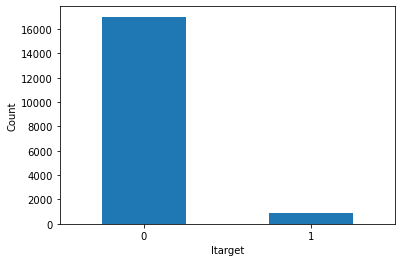

In [10]:
y.value_counts().plot(kind='bar', xlabel='Itarget', ylabel='Count', rot=0)

### Train and test split

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=0.2)

In [73]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(14304, 8)
(3576, 8)
(14304,)
(3576,)


In [81]:
print(y_test.value_counts())

0    3416
1     160
Name: fraudulent, dtype: int64


## Model implementation

### Metric evaluation:

1. In case of the fake job postings data, we need to predict if an applicant will be landing up in fake job or not.
2. Our model is not only to be accurate but also need to be sensitive to type1 and type2 erros.
3. The possible errors in our case are False Postive(FP) and False Negative(FN).
4. Comparing each errors, both FP and FN are important in this case because if the model predicts fake job and if it is a real job posting then the applicant might loss the opportunity and if the model predicts real job and if it is fake job posting then the applicant might get into scam.
5. Any cost, our model must make sure to reduce both the FN and FP and balance them. The best metric for both the errors is "F1 Score" because it takes both the ratio of precision and recall. 

Therefore we choose ,F1 score to be our final performance metric for comparision of model performance.

### Logistic regression

In [13]:
lr=LogisticRegression(random_state=11)
lr.fit(x_train,y_train)
pred_1=lr.predict(x_test)

C:\Users\manis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
score_1=f1_score(y_test,pred_1)
print('F1 score:',score_1)
print(confusion_matrix(y_test,pred_1))

F1 score: 0.03636363636363636
[[3414    2]
 [ 157    3]]


### Decision Trees

In [17]:
dt = DecisionTreeClassifier(random_state=22)
dt.fit(x_train,y_train)
pred_2=dt.predict(x_test)

In [72]:
score_2=f1_score(y_test,pred_2)
print('F1 score:',score_2)
print(confusion_matrix(y_test,pred_2))

F1 score: 0.5827338129496402
[[3379   37]
 [  79   81]]


## Random forest classifier

In [19]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_3=rfc.predict(x_test)

In [82]:
score_3=f1_score(y_test,pred_3)
print('F1 score:',score_3)
print(confusion_matrix(y_test,pred_3))

F1 score: 0.611764705882353
[[3399   17]
 [  82   78]]


## Addressing the data imbalance

In [11]:
real_N = len(data[data.fraudulent== 0])  
fake_N = len(data[data.fraudulent== 1]) 

print(f"   Total real cases: {real_N}")
print(f"   Total fake cases: {fake_N}")

   Total real cases: 17014
   Total fake cases: 866


We can clearly say that the data is imbalanced and baised to real cases. 95% of the data is towrads real cases. To balance the data we are applying oversampling technique

<AxesSubplot:xlabel='fraudulent', ylabel='count'>

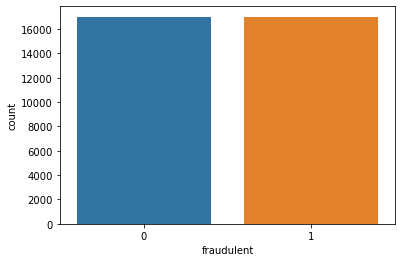

In [24]:
smote = SMOTE(random_state =300)
X_smote, Y_smote = smote.fit_resample(x,y)
sns.countplot(Y_smote)

In [25]:
smotex_train, smotex_test, smotey_train, smotey_test = train_test_split(X_smote, Y_smote, test_size=0.3,random_state=1)

In [33]:
print(smotex_train.shape)
print(smotey_train.shape)
print(smotex_test.shape)
print(smotey_test.shape)

(23819, 8)
(23819,)
(10209, 8)
(10209,)


In [84]:
print(smotey_test.value_counts())

0    5171
1    5038
Name: fraudulent, dtype: int64


### Logistic regression

In [26]:
lr1=LogisticRegression(random_state=21)
lr1.fit(smotex_train,smotey_train)
predict_1=lr1.predict(smotex_test)

C:\Users\manis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [85]:
score1=f1_score(smotey_test,predict_1)
print('F1 score:',score1)
print(confusion_matrix(smotey_test,predict_1))

F1 score: 0.7522577996715927
[[4130 1041]
 [1373 3665]]


### Decision Trees

In [30]:
dt1 = DecisionTreeClassifier(random_state=1)
dt1.fit(smotex_train,smotey_train)
predict_2=dt.predict(smotex_test)

In [86]:
score2=f1_score(smotey_test,predict_2)
print('F1 score:',score2)
print(confusion_matrix(smotey_test,predict_2))

F1 score: 0.7428216283405842
[[5152   19]
 [2050 2988]]


### KNN

In [34]:
knn1 = KNeighborsClassifier(n_neighbors=187,  metric='euclidean')
knn1.fit(smotex_train,smotey_train)
predict_3=knn1.predict(smotex_test)

In [87]:
score3 = f1_score(smotey_test,predict_3)
print('F1 score:',score3)
print(confusion_matrix(smotey_test,predict_3))

F1 score: 0.7921267402784445
[[3919 1252]
 [ 913 4125]]


### parameter tuning using knn 

In [44]:
## #List Hyperparameters that we want to tune.
%%time
leaf_size = list(range(1,50,5))
n_neighbors = list(range(1,200,5))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10,n_jobs=-1)
#Fit the model
best_model1 = clf.fit(smotex_train,smotey_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model1.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model1.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model1.best_estimator_.get_params()['n_neighbors'])

Wall time: 0 ns
Best leaf_size: 1
Best p: 1
Best n_neighbors: 1


In [93]:
predict_4=best_model1.predict(smotex_test)
score4 = f1_score(smotey_test,predict_4)
print('F1 score:',score4)
print(confusion_matrix(smotey_test,predict_4))

F1 score: 0.9172529977207413
[[4746  425]
 [ 410 4628]]


### Random forest classifier

In [46]:
classifier = RandomForestClassifier(random_state = 42)
classifier.fit(smotex_train,smotey_train)
predict_5=classifier.predict(smotex_test)

In [92]:
score5 = f1_score(smotey_test,predict_5)
print('F1 score:',score5)
print(confusion_matrix(smotey_test,predict_5))

F1 score: 0.9257233767525107
[[4807  364]
 [ 383 4655]]


### Parameter tuning with random forest

In [69]:
%%time
rd_grid = {'n_estimators': [50,100,200,300],
              'max_depth': [3,5,7,9],
              'max_features': ['auto', 'sqrt', None],
              'min_samples_split': range(1,10,2),
              'min_samples_leaf': range(2,10,2),
              'criterion': ['gini', 'entropy']}
classifier1 = RandomForestClassifier(random_state=20)
rf_search=GridSearchCV(estimator=classifier1, param_grid=rd_grid, cv=10,n_jobs=-1)
rf_search.fit(smotex_train,smotey_train)
print(rf_search.best_estimator_.get_params())
predict_6 = rf_search.predict(smotex_test)

C:\Users\manis\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3840 fits failed out of a total of 19200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3840 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\manis\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\manis\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "C:\Users\manis\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\manis\anaconda3\lib\site-pack

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 9, 'max_features': None, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 300, 'n_jobs': None, 'oob_score': False, 'random_state': 20, 'verbose': 0, 'warm_start': False}
Wall time: 2h 58s


In [91]:
score6 = f1_score(smotey_test,predict_6)
print('F1 score:',score6)
print(confusion_matrix(smotey_test,predict_6))

F1 score: 0.8937183685620721
[[4635  536]
 [ 535 4503]]


### XGBoost classifier

In [51]:
xgboost = XGBClassifier(random_state=1)
xgboost.fit(smotex_train,smotey_train)
predict_7 = xgboost.predict(smotex_test)

In [90]:
score7 = f1_score(smotey_test,predict_7)
print('F1 score:',score7)
print(confusion_matrix(smotey_test,predict_7))

F1 score: 0.9203469245339448
[[4794  377]
 [ 422 4616]]


### Parameter tuning with XGBoost

In [62]:
# Create the random grid
param_grid_random = {
    "n_estimators" : range(100, 500, 50),
    "max_depth" : range(3, 9, 2),
    "gamma" : [0.01, 0.1],
    "learning_rate" : [0.001, 0.01, 0.1, 1]
}

xgboost2 = XGBClassifier()
xgb_search =GridSearchCV(estimator=xgboost2, param_grid=param_grid_random, cv=3,n_jobs=-1)
best_xgb = xgb_search.fit(smotex_train,smotey_train)
print(best_xgb.best_estimator_.get_params())
predict_8 = best_xgb.predict(smotex_test)

{'objective': 'binary:logistic', 'use_label_encoder': False, 'base_score': 0.5, 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'gamma': 0.01, 'gpu_id': -1, 'grow_policy': 'depthwise', 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 1, 'max_bin': 256, 'max_cat_to_onehot': 4, 'max_delta_step': 0, 'max_depth': 7, 'max_leaves': 0, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 300, 'n_jobs': 0, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'sampling_method': 'uniform', 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


In [89]:
score8 = f1_score(smotey_test,predict_8)
print('F1 score:',score8)
print(confusion_matrix(smotey_test,predict_8))

F1 score: 0.9244682965613198
[[4798  373]
 [ 387 4651]]


## Analysis

For the above data we have applied various modelling techniques like logistic, decision trees and ensemble models with hyperparameter tuning. Among all the models with best parameters we achieved good results for random forest classifier.

### F1 score with random forest classifier: 0.9257233767525107